# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Files to load
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combined the data into a single DataFrame
complete_mouse_data = pd.merge(study_results, mouse_metadata,  on="Mouse ID", how="outer")


# Displayed the data table for preview
complete_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [ ]:
# Checked for the number of mice.
mouse_count =len(complete_mouse_data["Mouse ID"].unique())
mouse_count

249

In [ ]:
# Retrieved the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = complete_mouse_data[complete_mouse_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]


In [ ]:
# Retreived all the data for the duplicate mouse ID.
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Created a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = complete_mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
#Displayed results
mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [ ]:
# Checked for the number of mice in the clean DataFrame.
mice_count =len(mice_df["Mouse ID"].unique())
mice_count


249

## Summary Statistics

In [ ]:
# Generated a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean_Tumor_Volume = mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume = mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
Tumor_Volume_Variance = mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
Tumor_Volume_Std_Dev = mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
Tumor_Volume_Std_Err = mice_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
# Created a Dataframe
Mice_Tumor_df = {'Mean Tumor Volume': Mean_Tumor_Volume,
                'Median Tumor Volume': Median_Tumor_Volume,
                'Tumor Volume Variance': Tumor_Volume_Variance,
                'Tumor Volume Std. Dev.': Tumor_Volume_Std_Dev,
                'Tumor Volume Std. Err.': Tumor_Volume_Std_Err
                }
Mice_Tumor_df = pd.DataFrame(Mice_Tumor_df)

# Displayed results
Mice_Tumor_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Used a more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_mice_data = mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(Mean='mean', 
                                                                              Median='median', 
                                                                              Var='var', 
                                                                              Std='std', 
                                                                              SEM='sem')
# Used the aggregation method to produce the same summary statistics in a single line

# Displayed results
summary_mice_data

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Grouped the clean DataFrame by Drug Regimen and Timepoint then sorted by descending order
mice_bar = pd.DataFrame(mice_df.groupby('Drug Regimen')['Timepoint'].count())
mice_bar = mice_bar.sort_values(by='Timepoint', ascending=False)

# Displayed results
mice_bar

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

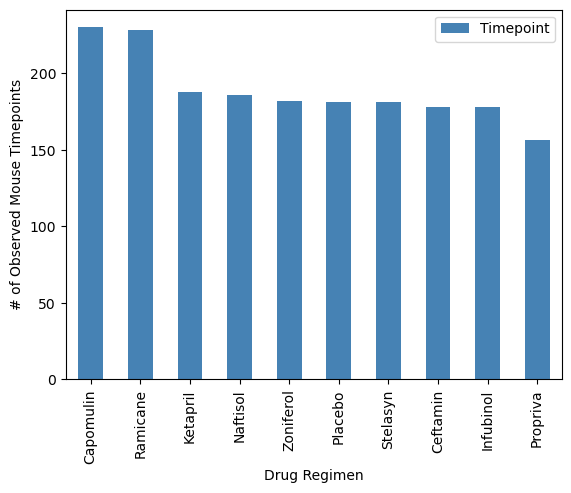

In [ ]:
# Generated a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_bar.plot(kind='bar', y='Timepoint', color='steelblue')
plt.xticks(rotation=90) 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

Text(0, 0.5, '# of Observed Mouse Timepoints')

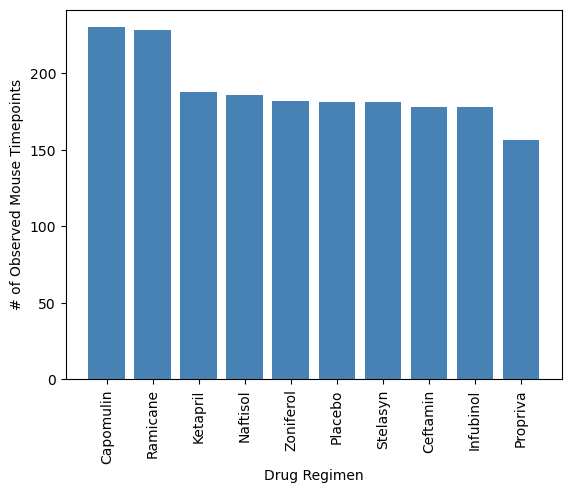

In [ ]:
# Generated a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mice_bar.index,mice_bar['Timepoint'], color='steelblue', align='center')
plt.xticks(rotation=90) 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

In [ ]:
# Created a DataFrame and grouped by Sex and Mouse ID. Then sorted in descending order.
mice_gender_plt = pd.DataFrame(mice_df.groupby('Sex')['Mouse ID'].count())
mice_gender_plt = mice_gender_plt.sort_values(by='Sex', ascending=False)

# Displayed results
mice_gender_plt

,Mouse ID
Sex,
Male,958
Female,930


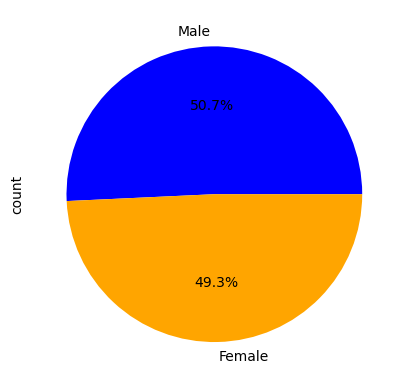

In [ ]:
# Generated a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
mice_gender_count = mice_gender_plt['Mouse ID']
mice_gender_count.plot(kind="pie", autopct='%1.1f%%', colors=["blue", "orange"])

# Provided a label for the y-axis
plt.ylabel("count")

# Displayed the pie chart
plt.show()

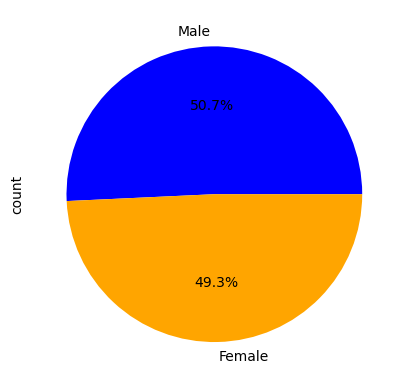

In [ ]:
# Generated a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ["Male", "Female"]
sizes = [mice_gender_plt.loc['Male'].values[0], mice_gender_plt.loc['Female'].values[0]]
colors = ["blue", "orange"]
# Formatted the pie chart and labeled the y-axis
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.ylabel("count")
# Displayed pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculated the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
timepoint = mice_df.groupby("Mouse ID").max()['Timepoint'].reset_index()

# Merged this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_data = pd.merge(timepoint, mice_df, on=['Mouse ID', 'Timepoint'])
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']

# Created an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculated the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    treatment_data = combined_data[combined_data['Drug Regimen']==treatment]
    tumor_vol_data.append(treatment_data['Tumor Volume (mm3)'].tolist())

    quartiles = treatment_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

# Created a subset  
    outliers = treatment_data[(treatment_data['Tumor Volume (mm3)'] < lower_bound) |
                              (treatment_data['Tumor Volume (mm3)'] > upper_bound)]

    print(f"{treatment} potential outliers: {outliers['Tumor Volume (mm3)'].values}")

Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []


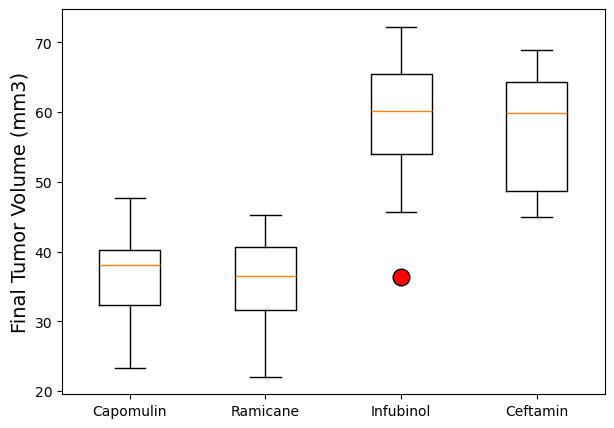

In [ ]:
# Generated a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(7, 5))  # Set the figure size
plt.boxplot(tumor_vol_data, 
            labels=treatments, 
            flierprops={'marker': 'o',
                        'markerfacecolor': 'red',
                        'markersize': 12}
            )  # Create box plot


plt.ylabel('Final Tumor Volume (mm3)', fontsize=14)


plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Average Tumor Volume(mm3)')

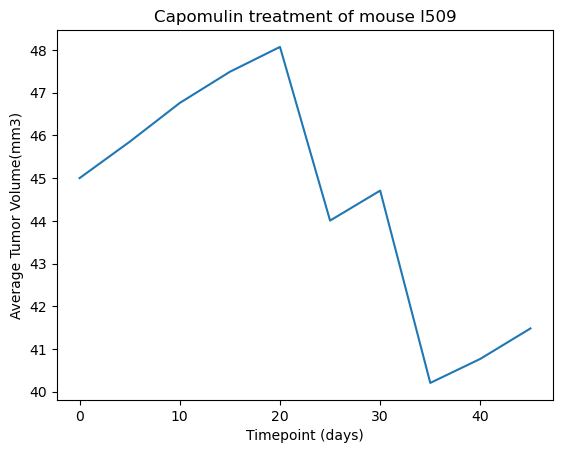

In [ ]:
# Generated a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = complete_mouse_data[complete_mouse_data['Mouse ID'] == mouse_id]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel('Timepoint (days)')
plt.ylabel('Average Tumor Volume(mm3)')


Text(0, 0.5, 'Average Tumor Volume(mm3)')

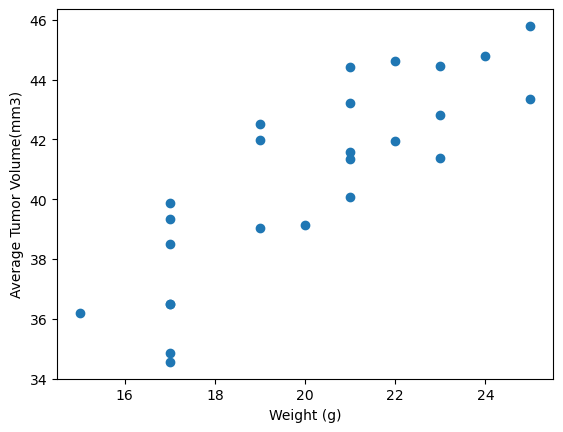

In [ ]:
# Generated a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = complete_mouse_data[complete_mouse_data["Drug Regimen"]== "Capomulin"]
weight = capomulin_data.groupby("Mouse ID")['Weight (g)'].mean()
tumor_volume = capomulin_data.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
plt.scatter(weight, tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


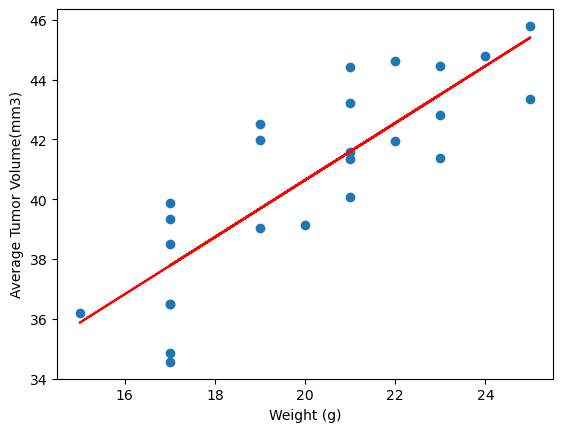

In [ ]:
# Calculated the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight, tumor_volume)
rounded_corr = round(correlation[0], 2)
print(f"The correlation between mouse weight and the average tumor volume is {rounded_corr}")

x_values = weight
y_values = tumor_volume

plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(weight, regress_values, color='red')